## Question 1. Hands-on Linear Regression
In this question, you need to write a program to find the coefficients of a linear regression model for the
dataset provided (data2.txt). Use NumPy to load the data and plot it [2 pts].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

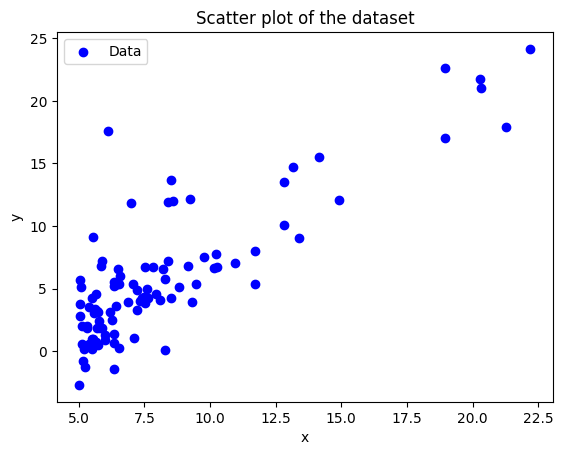

In [2]:
data = np.loadtxt("/Users/omiee/Documents/GitHub/MachineLearning/AAI-595 - Intro to Machine Learning/HW2/data2-2.txt", delimiter=',')
x = data[:, 0]  # Feature
y = data[:, 1]  # Target

print(data)

# Visualize the dataset
plt.scatter(x, y, marker='o', color='b', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the dataset')
plt.legend()
plt.show()

Assume a linear model: y = w0 + w1*x. 
### Method 1: Normal equation
Split the dataset into 80% for training and 20% for testing.
Hints: You can generate a sequence having the same length as the data number. Shuffle it at random. Select the first 80% as the training set and the other as the testing set.

In [3]:
# Function to compute predictions
def predict(x, w0, w1):
    return w0 + w1 * x

# Normal Equation method
def train_normal_equation(x, y):
    x_bias = np.c_[np.ones(x.shape[0]), x]  # Add bias term
    theta = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y)
    return theta[0], theta[1]  # Returns w0, w1



In [4]:
# Shuffle the dataset randomly
np.random.seed(42)  # Ensures reproducibility
np.random.shuffle(data)

# Split index (80% of the data)
split_index = int(0.8 * len(data))

# Training and testing sets
train_data = data[:split_index]
test_data = data[split_index:]

# Splitting into features (X) and targets (y)
x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]
"""
print("Training Set (X_train):", X_train)
print("Training Set (y_train):", y_train)
print("Testing Set (X_test):", X_test)
print("Testing Set (y_test):", y_test)
"""

'\nprint("Training Set (X_train):", X_train)\nprint("Training Set (y_train):", y_train)\nprint("Testing Set (X_test):", X_test)\nprint("Testing Set (y_test):", y_test)\n'

### Method 2: Stochastic gradient Descent
1. Use stochastic Gradient Descent to find the coefficients of the linear model. Plot MSE vs. iteration for both the training set and testing set in one figure:

Hint: Your code should include
1. Weights initialization. [2]
2. A loop updating the parameters based on the gradient (See Slide 22). The termination
conditions of the loop should at least include the maximum iteration number and the cost
function threshold. [10]
3. For each loop, MSE on the training and testing dataset should be calculated and stored for
plotting. [3]

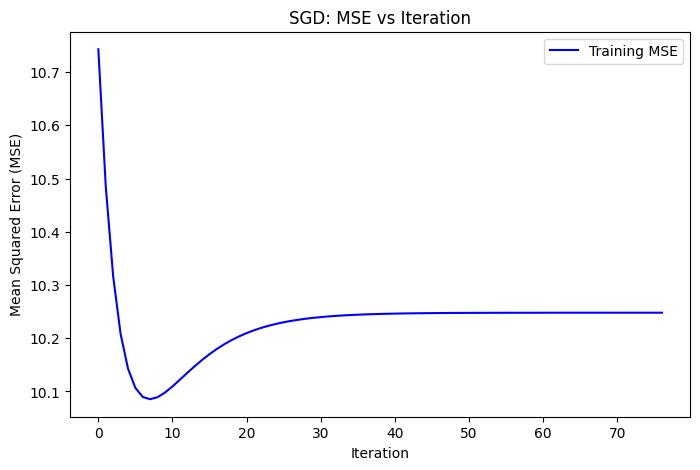

(np.float64(-3.5595451710904062), np.float64(1.2775861775879376))

In [5]:
# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(x_train, y_train, x_test, y_test, lr=0.01, max_iter=1000, tolerance=1e-6):

    w0, w1 = 0, 0  # Initialize weights
    n = len(y_train)
    train_mse_list = []
    test_mse_list = []
    
    for gradesc in range(max_iter):
        for i in range(n):
            x_i, y_i = x_train[i], y_train[i]
            y_pred = w0 + w1 * x_i
            error = y_pred - y_i
            
            # Update weights
            w0 -= lr * error
            w1 -= lr * error * x_i
        
        # Compute MSE for training and testing data
        y_train_pred = w0 + w1 * x_train
        y_test_pred = w0 + w1 * x_test
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        
        # Convergence check (stop if change in loss is below tolerance)
        if gradesc > 0 and abs(train_mse_list[-1] - train_mse_list[-2]) < tolerance:
            break
    
    return w0, w1, train_mse_list, test_mse_list

# Run SGD with learning rate 0.01
w0_sgd, w1_sgd, train_mse_sgd, test_mse_sgd = stochastic_gradient_descent(x_train, y_train, x_test, y_test, lr=0.01, max_iter=1000)

# Plot MSE vs Iteration for Training and Testing Sets
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_mse_sgd)), train_mse_sgd, label='Training MSE', color='blue')
#plt.plot(range(len(test_mse_sgd)), test_mse_sgd, label='Testing MSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SGD: MSE vs Iteration')
plt.legend()
plt.show()

# Output results
w0_sgd, w1_sgd